In [5]:
%gui asyncio

import asyncio
import tclab
from ipywidgets import FloatSlider

# get the current event loop
loop = asyncio.get_event_loop()

# monotonic time function
time = loop.time

# time grid
tstart = time()
tfinish = tstart + 30
tstep = 2

sliderSP = FloatSlider(min=25, max=80, step=0.5)

lab = tclab.setup(connected=True)
a = lab()

async def update():
    while time() < tfinish:
        t = time() - tstart
        PV = a.T1
        SP = sliderSP.value
        MV = 100 if PV < SP else 0
        a.U1 = MV
        print(t, PV, SP, MV)
        await asyncio.sleep(tstep - (time() - tstart) % tstep)

task = asyncio.ensure_future(update())
sliderSP

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.


A Jupyter Widget

2.27643956700922 20.26 25.0 100
4.005142445006641 20.26 25.0 100
6.002250107994769 20.26 25.0 100
8.002995402988745 20.58 25.0 100
10.000107220985228 20.58 25.0 100
12.001202960003866 20.91 25.0 100
14.002858744002879 21.23 25.0 100
16.003714855003636 21.55 25.0 100
18.00459742100793 21.87 25.0 100
20.00389687399729 22.52 25.0 100
22.00421101198299 22.84 25.0 100
24.00309753700276 23.48 25.0 100
26.00494129199069 24.13 25.0 100
28.001427032984793 24.45 25.0 100


In [21]:
task.cancel()
a.close()

TCLab disconnected successfully.


In [16]:
import asyncio

async def myfun():
    print(2)

In [14]:
loop.is_closed()

False

<IPython.core.display.Javascript object>


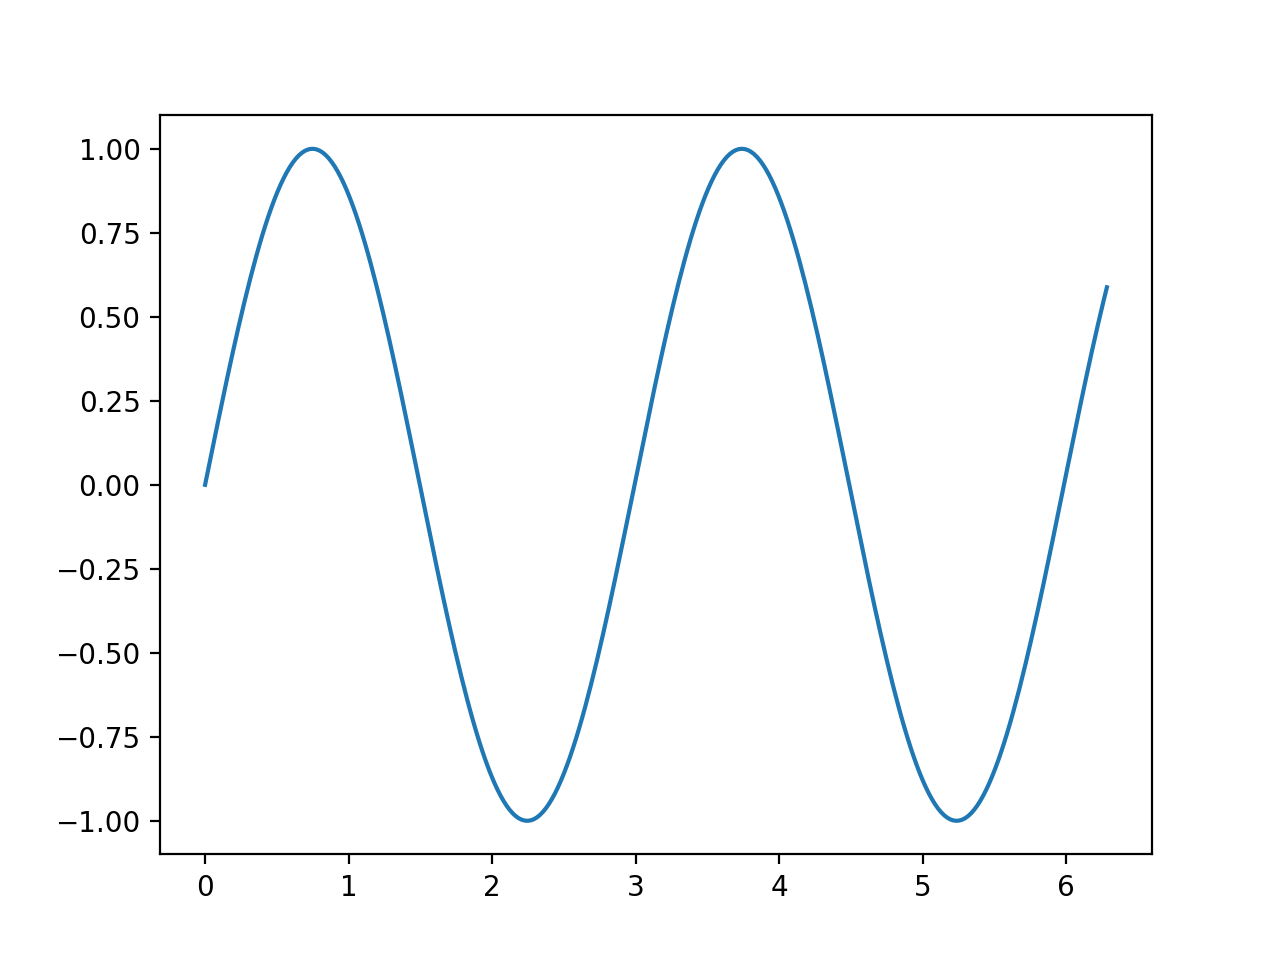

A Jupyter Widget

In [3]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 300)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);

In [7]:
import asyncio

SP = 40

async def update():
    for k in range(0,10):
        PV = 12
        MV = 10*(SP-PV)
        print(k, PV, SP, MV, a.value)
        await asyncio.sleep(1)
    
loop = asyncio.get_event_loop()
loop.run_until_complete(update())



RuntimeError: This event loop is already running

A Jupyter Widget

5 12 40 280 0
6 12 40 280 46
7 12 40 280 46
8 12 40 280 46
9 12 40 280 46
